<h1>Opportunity Zone Analysis</h1>

<p>This will be a notebook where I will attempt to analyze Opportunity Zones.</p>
<h4>Sources:</h4>
<p><a href="">US Census Data from Kaggle</a><br><a href="https://www.cdfifund.gov/Pages/Opportunity-Zones.aspx">CDFI OZs</a></p>

This is take two. I learned a little bit more. And I want to attempt to do a better analysis. This time I got the data straight from the census website. The data I have collected is 2019 5 year tract data, 2017 5 year tract data, and then the same list of Opportunity Zones.

From Wikipedia:
An Opportunity Zone is a designation created by the Tax Cuts and Jobs Act of 2017 allowing for certain investments in lower income areas to have tax advantages.
The purpose of an OZ is to put capital to work that would otherwise be locked up due to the asset holder's unwillingness to trigger a capital gains tax.

To qualify as an OZ one of the following must be met:
The tract has at least a 20% poverty rate.
The median family income in the tract is below a certain threshold. The relevant threshold is determined by whether the tract is located within a metropolitan area and whether it is located in a High Migration Rural County.
The tract’s population is less than 2,000 people AND it is within an empowerment zone AND is contiguous with another Low-Income community (this only became relevant with the passage of the Bipartisan Budget Act of 2018 on 2/9/2018).

In addition to Low-Income Communities, the Opportunity Zones program allows for designation of a small number of tracts that are not themselves Low-Income Communities but that are contiguous with Low-Income communities. These can account for up to 5 percent (rounded up) of the total number of tracts designated. Tracts must meet both of to be eligible for designation under this part of the program:

Be contiguous with at least one Low-Income Community that has been designated as an Opportunity Zone (note that this could be a designation by another state, meaning states will likely need to coordinate on designations to make this possible).
Have a median family income that does not exceed 125 percent of the median family income of at least one contiguous Low-Income Community. 

Source (copy and pasted from here): https://www.enterprisecommunity.org/blog/understanding-opportunity-zones-eligibility

With this in mind the purpose of an Opportunity Zone according to the IRS is: A. Opportunity zones are an economic development tool—that is, they are designed to spur economic development and job creation in distressed communities.


So my first goal will be to analyze the 2017 data, or roughly the same data local politicians, govenors and finally the federal government used to choose the opportunity zones. Just to get a broad view of various characteristics of Opportunity Zones. I will then look at more recent data and see if the designed purpose has been met. (I may have to wait a few more years for this.)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.express as px


columns_2016 = ['GIDTR','State', 'State_name', 'County', 'County_name', 'Tract',
       'Tot_Population_ACS_10_14','Tot_Housing_Units_ACS_10_14',
       'pct_URBANIZED_AREA_POP_CEN_2010', 'pct_URBAN_CLUSTER_POP_CEN_2010',
       'pct_RURAL_POP_CEN_2010', 'pct_Males_ACS_10_14',
       'pct_Females_ACS_10_14', 'pct_Hispanic_ACS_10_14',
       'pct_NH_White_alone_ACS_10_14', 'pct_NH_Blk_alone_ACS_10_14',
       'pct_NH_AIAN_alone_ACS_10_14', 'pct_NH_Asian_alone_ACS_10_14',
       'pct_NH_NHOPI_alone_ACS_10_14', 'pct_NH_SOR_alone_ACS_10_14',
       'pct_Not_HS_Grad_ACS_10_14', 'pct_College_ACS_10_14',
       'pct_Prs_Blw_Pov_Lev_ACS_10_14', 'pct_No_Health_Ins_ACS_10_14',
       'pct_Civ_unemp_16p_ACS_10_14', 'pct_Pop_Disabled_ACS_10_14',
       'pct_NON_US_Cit_ACS_10_14', 'pct_ENG_VW_ACS_10_14',
       'pct_HHD_Moved_in_ACS_10_14', 'pct_PUB_ASST_INC_ACS_10_14',
       'pct_Recent_Built_HU_ACS_10_14', 'avg_Agg_House_Value_ACS_10_14',
       'avg_Agg_HH_INC_ACS_10_14']

columns_2019= ['GIDTR','State', 'State_name', 'County', 'County_name', 'Tract',
       'Tot_Population_ACS_13_17', 'Pop_in_HHD_ACS_13_17', 'Tot_Housing_Units_ACS_13_17', 
       'pct_URBANIZED_AREA_POP_CEN_2010',
       'pct_URBAN_CLUSTER_POP_CEN_2010', 'pct_RURAL_POP_CEN_2010',
       'pct_Males_ACS_13_17', 'pct_Females_ACS_13_17',
       'pct_Hispanic_ACS_13_17', 'pct_NH_White_alone_ACS_13_17',
       'pct_NH_Blk_alone_ACS_13_17', 'pct_NH_AIAN_alone_ACS_13_17',
       'pct_NH_Asian_alone_ACS_13_17', 'pct_NH_NHOPI_alone_ACS_13_17',
       'pct_NH_SOR_alone_ACS_13_17', 'pct_Not_HS_Grad_ACS_13_17',
       'pct_College_ACS_13_17', 'pct_Prs_Blw_Pov_Lev_ACS_13_17',
       'pct_No_Health_Ins_ACS_13_17', 'pct_Civ_unemp_16p_ACS_13_17',
       'pct_Pop_Disabled_ACS_13_17', 'pct_NON_US_Cit_ACS_13_17',
       'pct_ENG_VW_ACS_13_17', 'pct_HHD_Moved_in_ACS_13_17',
       'pct_PUB_ASST_INC_ACS_13_17', 'pct_Recent_Built_HU_ACS_13_17', 
       'avg_Agg_House_Value_ACS_13_17', 'avg_Agg_HH_INC_ACS_13_17']

# Import four data sources
acs_2016 = pd.read_csv('ACS20165year.csv', encoding='latin-1', usecols=columns_2016, index_col="GIDTR")
acs_2019 = pd.read_csv('ACS20195year.csv', encoding='latin-1', usecols=columns_2019, index_col="GIDTR")

op_zones = pd.read_excel('Designated QOZs.12.14.18.xlsx', header=4, usecols=["Census Tract Number", "Tract Type"], 
                         index_col="Census Tract Number")
op_zones.index.rename('GIDTR', inplace=True)
state_pop = pd.read_csv('2016StatePopulation.csv', skiprows=2, names=["id", "state", "pop", "moe"], 
                        usecols=["state", "pop"], index_col="state").sort_values("pop", ascending=False)

In [2]:
def convert_dollars_to_floats(column):
    acs_2016[column] = acs_2016[column].replace('[\$,]', '', regex=True).astype(float)
    
dollar_columns = ['avg_Agg_House_Value_ACS_10_14', 'avg_Agg_HH_INC_ACS_10_14']

for column in dollar_columns:
    convert_dollars_to_floats(column);

op_zones_acs_2016 = op_zones.join(acs_2016)

# Remove null rows aka small islands outside of continental US
op_zones_null = op_zones_acs_2016.copy()

# First remove type of community columns since it has 0 null values
op_zones_null.drop('Tract Type', axis=1, inplace=True)
# Next find rows with all null values
null_indexes = op_zones_null[op_zones_null.isnull().all(axis=1)].index

# Drop the rows from both dataframes and just ignore these parts of the country (since no data)
op_zones_acs_2016.drop(null_indexes, inplace=True)

# remove duplicates
op_zones_acs_2016.drop_duplicates(keep = 'first', inplace = True) 


Now that we have the data pretty cleaned up, it's time for anaylzing

Let's first show where the opportunity zones are in the US

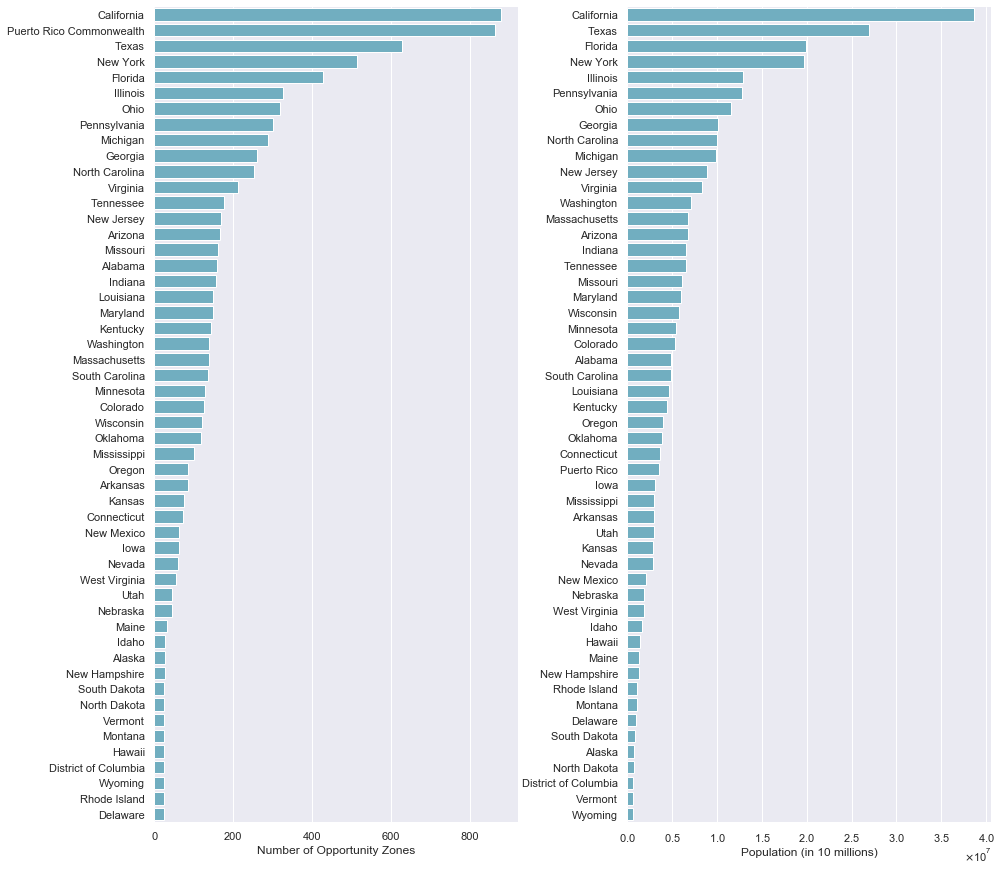

In [3]:
oz_by_state_counts = op_zones_acs_2016['State_name'].value_counts().sort_values(ascending=False).to_frame()
oz_by_state_counts.columns = ["num_of_oz"]

sns.set(style="darkgrid")
fig, axes = plt.subplots(1,2, figsize=(15, 15))
sns.barplot(y=oz_by_state_counts.index, x='num_of_oz', data=oz_by_state_counts, color='c', ax=axes[0])
sns.barplot(y=state_pop.index, x='pop', data=state_pop, color='c', ax=axes[1])

axes[0].set(xlabel="Number of Opportunity Zones", ylabel="")
axes[1].set(xlabel="Population (in 10 millions)", ylabel="")
axes[1].ticklabel_format(style='sci', axis='x', scilimits=(0,7), useMathText=True)

fig.subplots_adjust(wspace=.3)
sns.despine(left=True, bottom=True)

In [4]:
pyo.init_notebook_mode()

us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico Commonwealth': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

oz_by_state_counts = oz_by_state_counts.rename(index=us_state_abbrev)

#Map magic :D
fig = px.choropleth(locations=oz_by_state_counts.index, locationmode="USA-states", range_color=(0,900),
                    color=oz_by_state_counts["num_of_oz"], scope="usa",
                    labels={"locations": "State", "color": "Number of Op Zones"}, 
                    title="Number of Opportunity Zones per State (not including territories)")
fig.show()

# for comparison showing population of each state in 2016

state_pop = state_pop.rename(index={"Puerto Rico": 'Puerto Rico Commonwealth'})
state_pop = state_pop.rename(index=us_state_abbrev)


fig = px.choropleth(locations=state_pop.index, locationmode="USA-states",
                    color=state_pop["pop"], scope="usa",
                    labels={"locations": "State", "color": "Population"}, 
                    title="Population (not including territories) in millions")

fig.show()





Text(-50, 40, 'Puerto Rico')

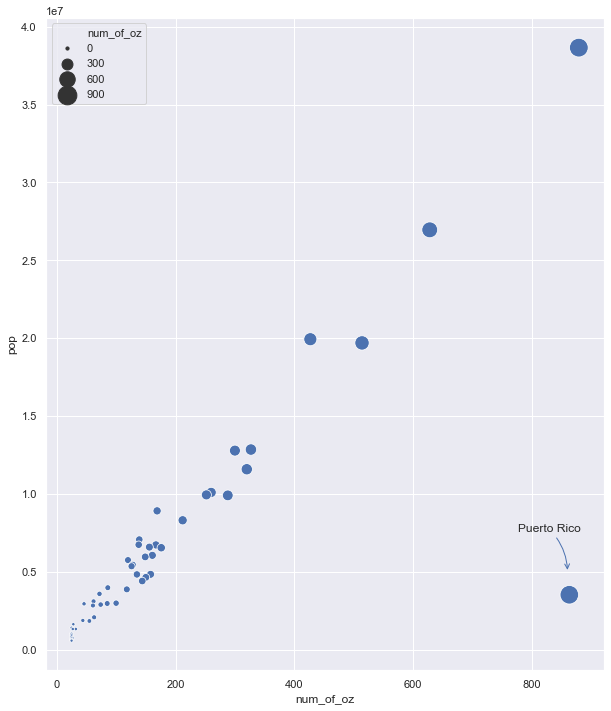

In [5]:
# Show actual correlation between population and number of OZs

oz_pop = state_pop.join(oz_by_state_counts)

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
fig, ax = plt.subplots(figsize=(10,12))
sns.scatterplot(x="num_of_oz", y="pop", 
                     size="num_of_oz",
                     sizes=(10, 350),
                     palette=cmap,
                     data=oz_pop)

plt.annotate('Puerto Rico', 
             xy=(860, 5000000),
             xytext=(-50, 40),
             xycoords='data',
             textcoords='offset points',
             arrowprops=dict(arrowstyle="->", color='b', connectionstyle="arc3,rad=-.2"))


**Maybe insert county data here if you can locate it**

So far this analysis is not terribly informative. It would be more ideal to look at if there is a correlation between poverty level and if a tract is an opportunity zone or not.

Most postivly correlated values are Poverty rate, Unemployment amount, and Not a high school grad.
Most negativly correlated values are white people, and percetage of college graduates


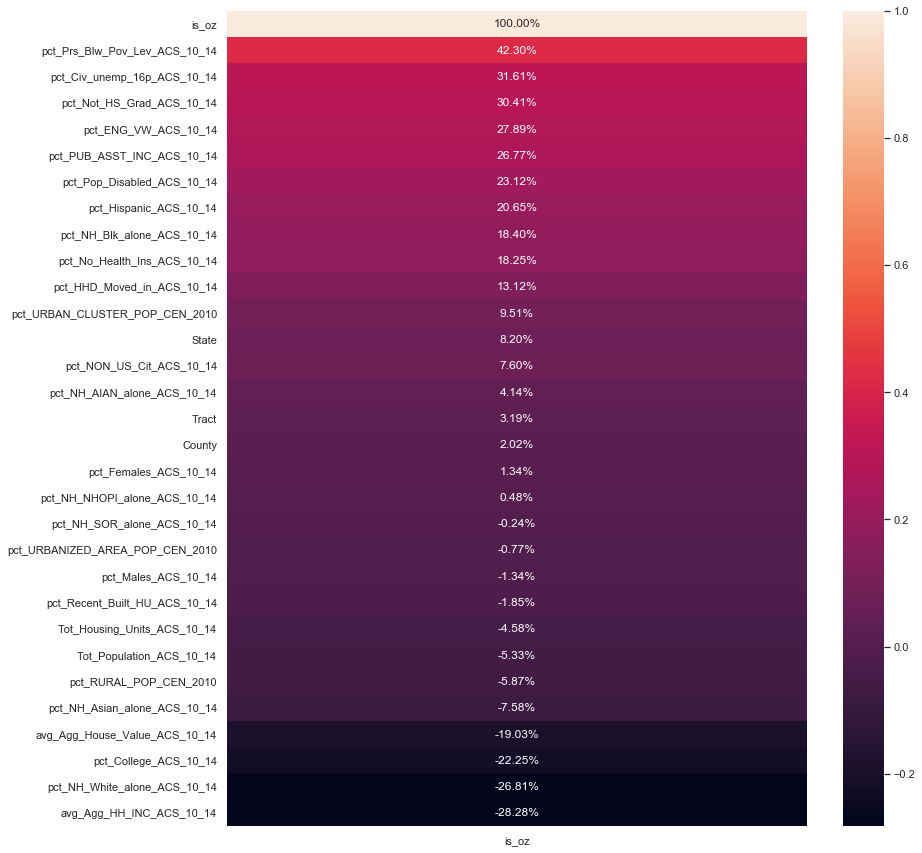

In [6]:
# THERE MUST BE A BETTER WAY TO DO THIS, ugly af

is_oz = acs_2016.loc[op_zones_acs_2016.index, :]
# Drop second occurance because it's null for some reason (only 3)
is_oz.drop_duplicates(keep = 'first', inplace = True)
# create row specifying if a tract is an op zone
acs_2016['is_oz'] = acs_2016.index.isin(acs_2016.loc[is_oz.index, []].index)

print('Most postivly correlated values are Poverty rate, Unemployment amount, and Not a high school grad.')
print('Most negativly correlated values are white people, and percetage of college graduates')
f, ax = plt.subplots(figsize=(13, 15))
sns.heatmap(acs_2016.corr()['is_oz'].to_frame().sort_values('is_oz',ascending=False), annot=True, fmt=".2%")


This gives a general sense of which attributes most influenced in the creation of opportunity zones. And if we remember what the goal was: "Opportunity zones are an economic development tool—that is, they are designed to spur economic development and job creation in distressed communities". The correlations look accurate, although in my opinion these correlations should be stronger.

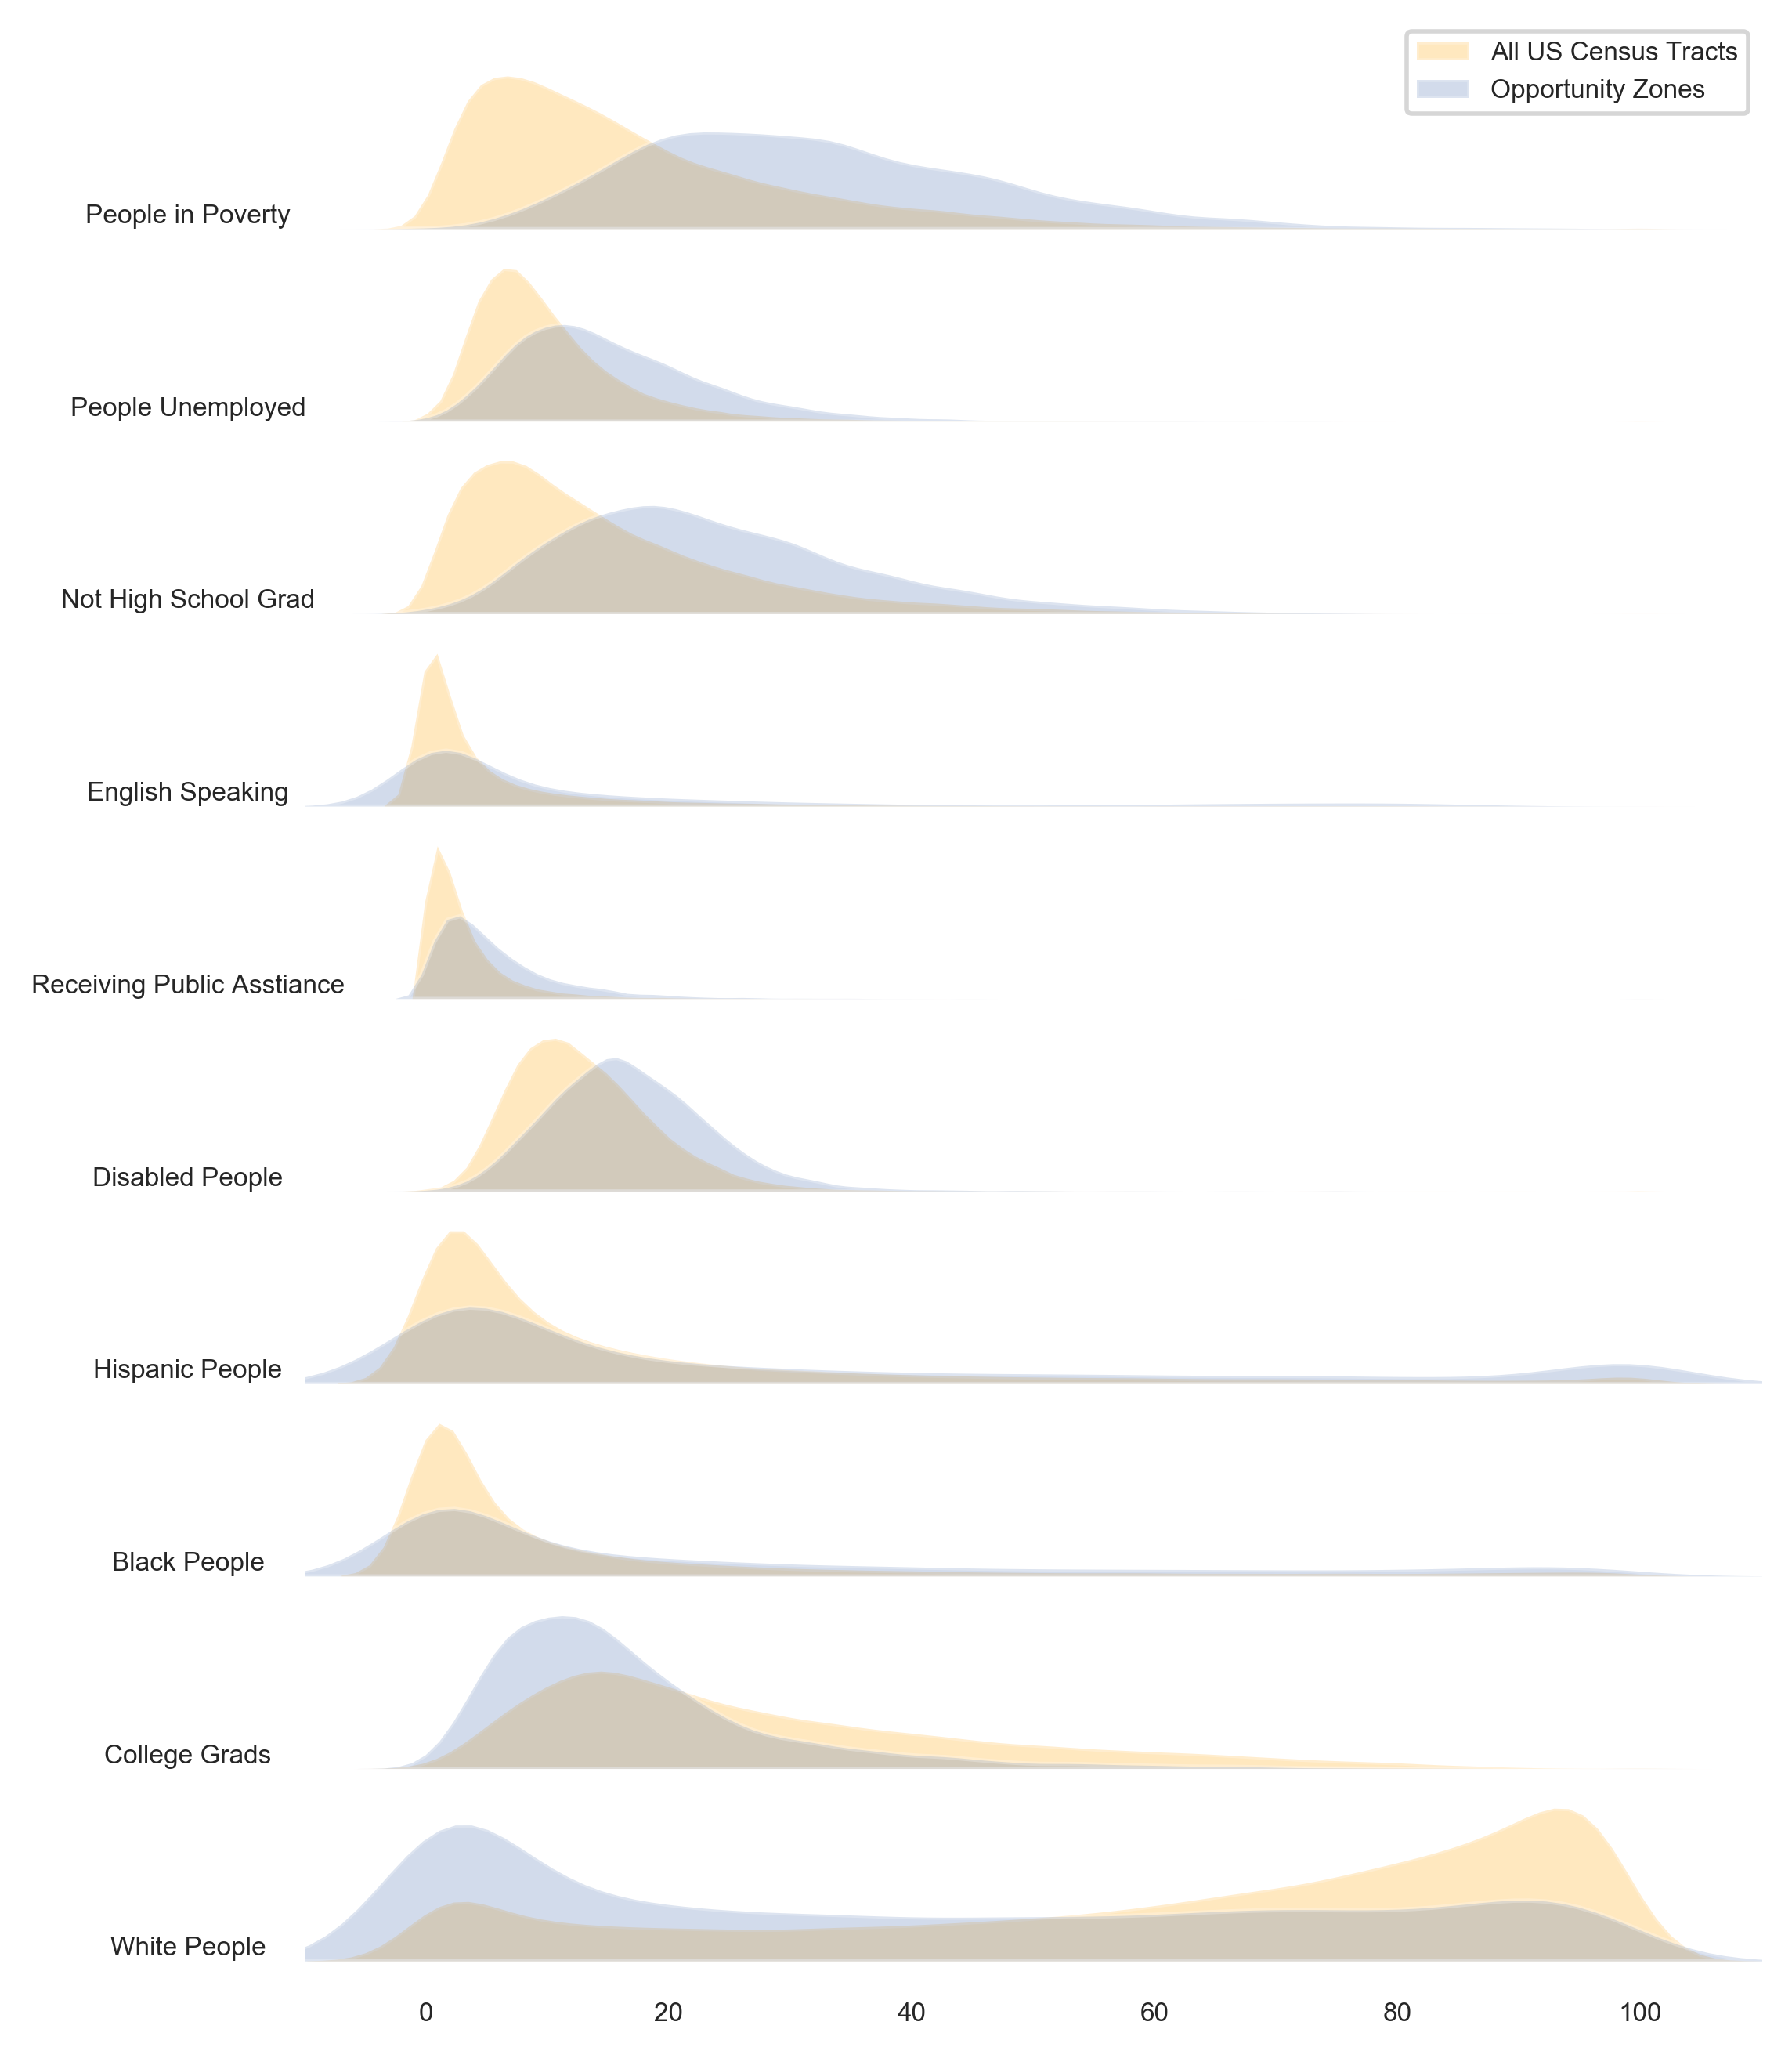

In [65]:
sns.set(style="white", palette="deep")

def create_kde_plots(columns, labels):
    f, axes = plt.subplots(len(columns), 1, figsize=(6, 8), dpi=400, sharex=True)
    sns.despine(left=True, bottom=True)
    plt.setp(axes, yticks=[], xlim=(-10,110))
    for index, column in enumerate(columns):
        ax1 = sns.kdeplot(acs_2016[column], shade=True, color="orange", ax=axes[index])
        ax2 = sns.kdeplot(op_zones_acs_2016[column], shade=True, color="b", ax=axes[index])
        ax1.yaxis.set_label_coords(-0.08,0)
        ax1.set_ylabel(labels[index], rotation=0, fontsize=6)
        ax1.xaxis.set_tick_params(labelsize=6)
        ax1.get_lines()[0].remove()
        ax2.get_lines()[0].remove()
        if index == 0:
            ax1.legend(['All US Census Tracts', 'Opportunity Zones'], prop={'size': 6}, bbox_to_anchor=(.9, 0.9),
           bbox_transform=plt.gcf().transFigure)
        else:
            ax1.get_legend().remove()




columns = ['pct_Prs_Blw_Pov_Lev_ACS_10_14',  
           'pct_Civ_unemp_16p_ACS_10_14', 
           'pct_Not_HS_Grad_ACS_10_14',
           'pct_ENG_VW_ACS_10_14',
           'pct_PUB_ASST_INC_ACS_10_14',
           'pct_Pop_Disabled_ACS_10_14',
           'pct_Hispanic_ACS_10_14',
           'pct_NH_Blk_alone_ACS_10_14',
           'pct_College_ACS_10_14',
           'pct_NH_White_alone_ACS_10_14']
labels = ['People in Poverty', 
          'People Unemployed', 
          'Not High School Grad',
          'English Speaking',
          'Receiving Public Asstiance',
          'Disabled People',
          'Hispanic People',
          'Black People',
          'College Grads',
          'White People']

create_kde_plots(columns, labels)


plt.show()

(0, 600000)

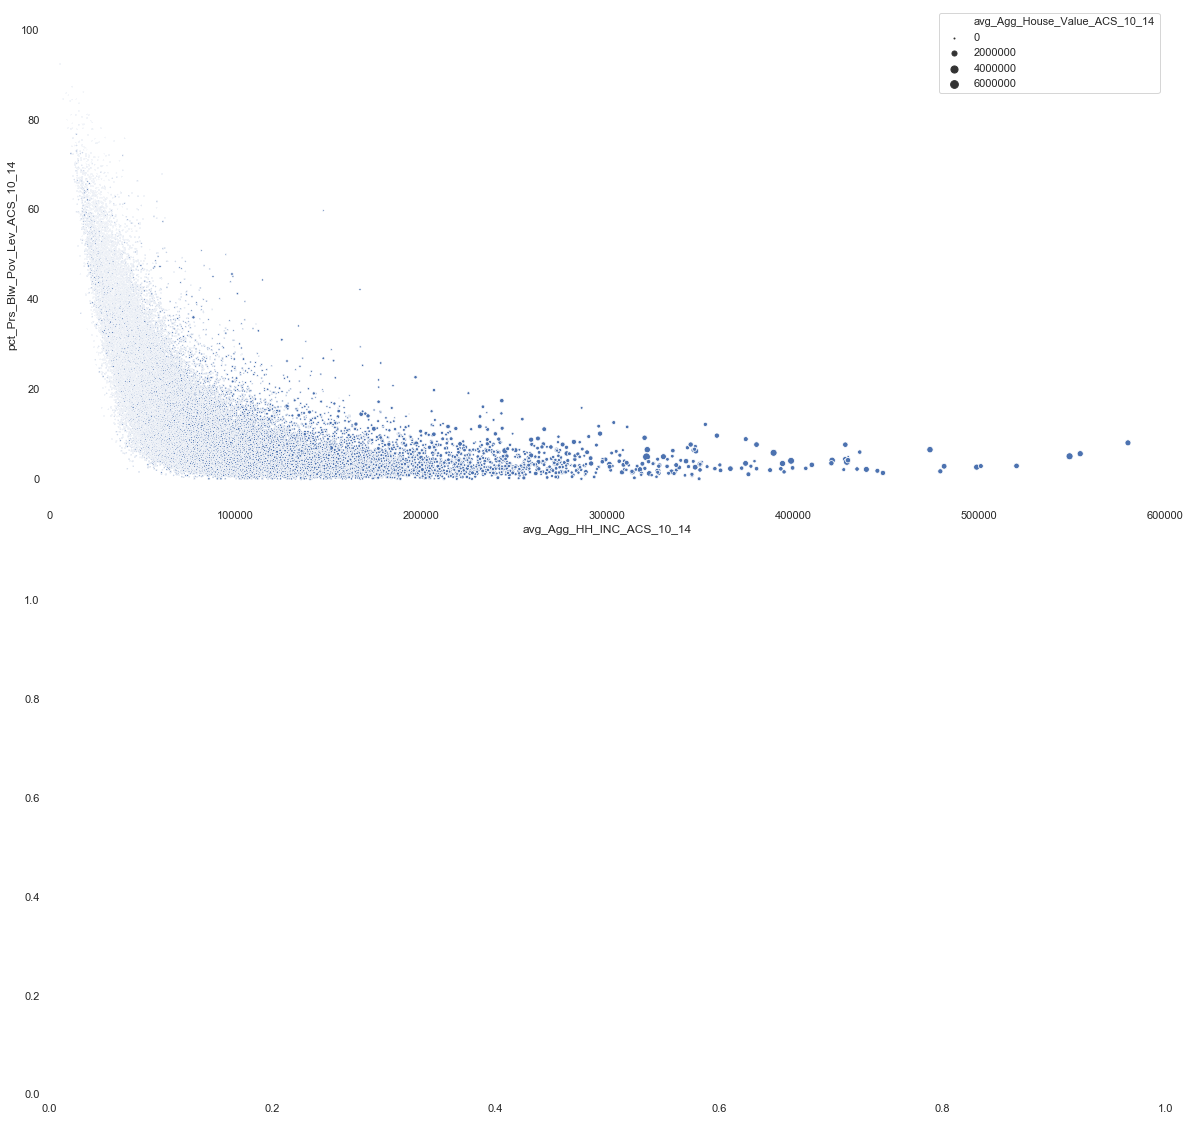

In [66]:

f, axes = plt.subplots(2, 1, figsize=(20, 20))

sns.despine(left=True, bottom=True)

ax1 = sns.scatterplot(x="avg_Agg_HH_INC_ACS_10_14", y="pct_Prs_Blw_Pov_Lev_ACS_10_14", sizes=(1, 60), 
                      size="avg_Agg_House_Value_ACS_10_14", data=acs_2016, ax=axes[0])

ax1.set_ylim(-5,105)
ax2.set_ylim(-5,105)
ax1.set_xlim(0,600000)
ax2.set_xlim(0,600000)



In [107]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

not_null_oz = op_zones_acs_2016.dropna().iloc[:, 6:]

scaler = StandardScaler()
scaler.fit(not_null_oz)
oz_scaled = scaler.transform(not_null_oz)

dbscan = DBSCAN(min_samples=100, eps=.3)

clusters = dbscan.fit_predict(oz_scaled)

print(pd.DataFrame(clusters).describe())

            0
count  8141.0
mean     -1.0
std       0.0
min      -1.0
25%      -1.0
50%      -1.0
75%      -1.0
max      -1.0
